In [1]:
from qsextra import ExcitonicSystem, ChromophoreSystem
from qsextra.tools import kron, spectral_function
from qsextra.qcomo import clevolve
from qsextra.spectroscopy import FeynmanDiagram, clspectroscopy
from qsextra.spectroscopy.postprocessing import postprocessing
from qutip import sigmax, sigmaz, identity, expect, ket, bra, mesolve
import numpy as np
from scipy.linalg import toeplitz
import matplotlib.pyplot as plt

In [2]:
I = identity(2)
X = sigmax()
Z = sigmaz()
def e_ops(N, op):
    I = identity(2)
    ops_list = []
    for i in range(N):
        ops_list.append(kron(*[I]*(N-i-1), op, *[I]*i))
    return ops_list

In [3]:
epsilon = [1, 2.5]
J = toeplitz([0., 0.,])
N = len(epsilon)

In [4]:
esys = ExcitonicSystem(energies = epsilon,
                       dipole_moments = [1.] * N,
                       couplings = J,
                      )

eigvals, _ = np.linalg.eig(esys.get_e_Hamiltonian().full())
eigvals -= np.min(eigvals)

In [5]:
dt = 0.1
t_list = np.arange(0, 50, dt)
dephasing_rate = 0.1

spec = FeynmanDiagram('a', t_list)

### Exciton System

In [6]:
signal_ex = clspectroscopy(esys, spec, rates=dephasing_rate)

We do not wash our pits in the pool of sacred tears. [Master Shifu]


In [7]:
freq, spectrum_ex = postprocessing(spec,
                                signal_ex,
                                pad_extension = 3,
                               )

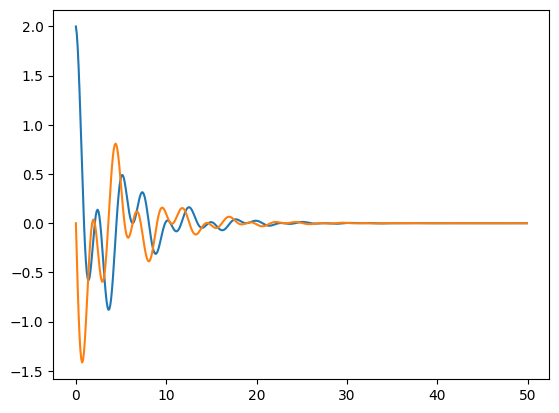

In [8]:
plt.plot(t_list, signal_ex.real)
plt.plot(t_list, signal_ex.imag)

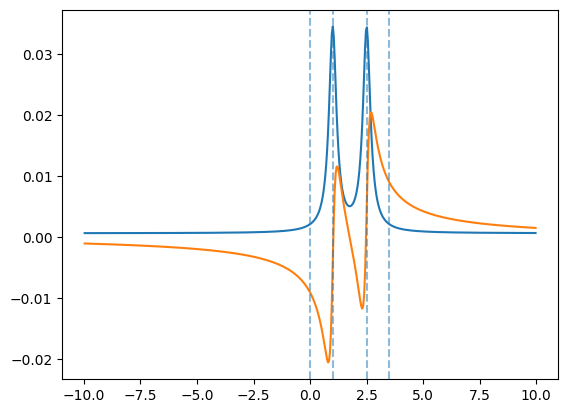

In [9]:
plt.plot(freq[np.abs(freq)<10], spectrum_ex.real[np.abs(freq)<10])
plt.plot(freq[np.abs(freq)<10], spectrum_ex.imag[np.abs(freq)<10])
[plt.axvline(x=eigval.real, linestyle='--', alpha = 0.5) for eigval in eigvals]

### Chromophore system

In [11]:
sys = ChromophoreSystem(excitonic_system = esys)

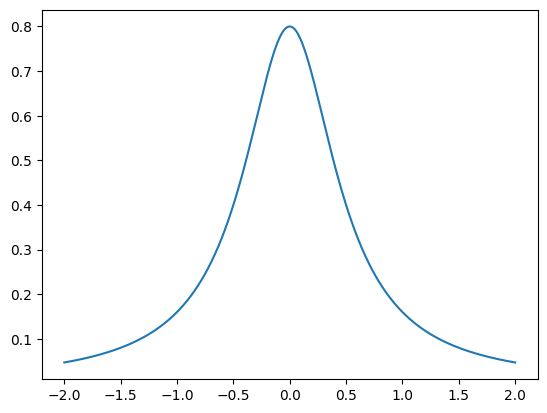

In [26]:
frequencies_pseudomode = [0]*2
Gamma = [dephasing_rate*4]*2
Omega = [0.5]*2
fr, sf = spectral_function(frequencies_pseudomode, Gamma, Omega)
plt.plot(fr, sf)

In [27]:
sys.pseudomodes(frequencies_pseudomode = frequencies_pseudomode,
                levels_pseudomode = [2]*len(frequencies_pseudomode),
                couplings_ep = np.sqrt(np.array(Gamma)*np.array(Omega)/2).tolist(),
               )
coll_rate = (2 * np.array(Omega)).tolist()

In [28]:
signal_ch = clspectroscopy(sys, spec, rates=coll_rate)

There is no charge for awesome. [Po]


In [29]:
freq, spectrum_ch = postprocessing(spec,
                                signal_ch,
                                pad_extension = 3,
                               )

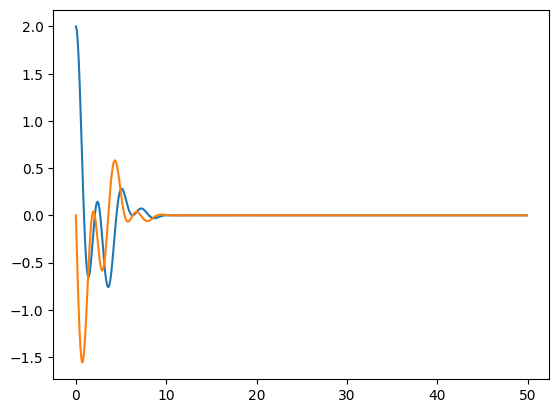

In [30]:
plt.plot(t_list, signal_ch.real)
plt.plot(t_list, signal_ch.imag)

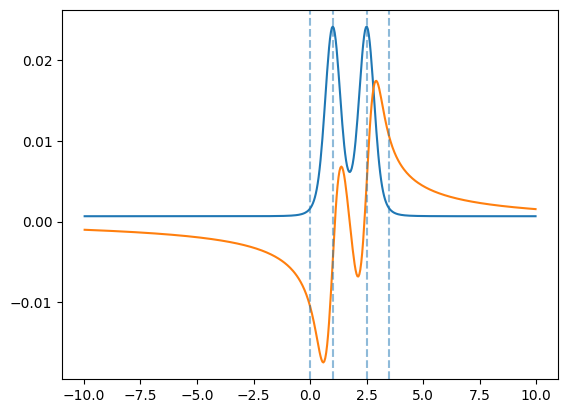

In [31]:
plt.plot(freq[np.abs(freq)<10], spectrum_ch.real[np.abs(freq)<10])
plt.plot(freq[np.abs(freq)<10], spectrum_ch.imag[np.abs(freq)<10])
[plt.axvline(x=eigval.real, linestyle='--', alpha = 0.5) for eigval in eigvals]

### Comparison

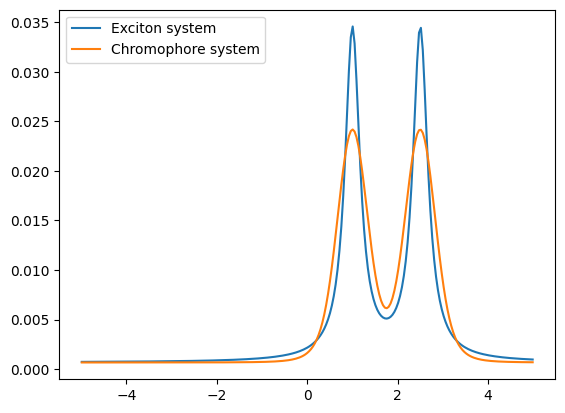

In [32]:
cut_f = 5
plt.plot(freq[np.abs(freq)<cut_f], spectrum_ex.real[np.abs(freq)<cut_f], label = 'Exciton system')
plt.plot(freq[np.abs(freq)<cut_f], spectrum_ch.real[np.abs(freq)<cut_f], label = 'Chromophore system')
plt.legend()